# Global Power Plant Database

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [29]:
# to check thd first 5 columns of the dataframe. 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [30]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [32]:
df.shape

(907, 27)

In [33]:
# printing the number of rows and the columns.
print('Number of columns - ',df.shape[1])
print('Number of rows - ',df.shape[0])

Number of columns -  27
Number of rows -  907


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [35]:
#There are two float64, object.

In [36]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

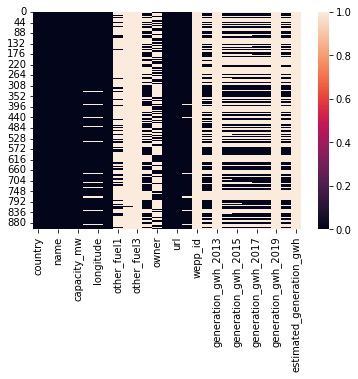

In [37]:
sns.heatmap(df.isnull())

In [13]:

for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

NameError: name 'df' is not defined

In [14]:
# to check the no. of unique values present in the data.
df.nunique().to_frame("No. of unique value")

NameError: name 'df' is not defined

In [15]:
df.isnull().sum()

NameError: name 'df' is not defined

In [16]:
# Replacing the missing values in the Numerical Columns using the mean method 
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

NameError: name 'df' is not defined

In [17]:
# Repacing the categorical values with the mode im the dataframe. 
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)


NameError: name 'df' is not defined

In [18]:
df.isnull().sum()

NameError: name 'df' is not defined

In [19]:
# dropping the missing values. 
df = df.dropna(axis=1)

NameError: name 'df' is not defined

In [20]:
# Checking the shape of the dataframe.
df.shape

NameError: name 'df' is not defined

In [21]:
# checking the sum of the missing value. 
df.isnull().sum()

NameError: name 'df' is not defined

In [22]:
df.drop(['country', 'url', 'country_long'], axis=1, inplace=True)

NameError: name 'df' is not defined

- As we have already have source as the column name we have consedered to drop the urls.
- In my opinion since IND is the only country in the feature: country, therefore i have dropped it

In [23]:

sns.heatmap(df.isnull())

NameError: name 'df' is not defined

In [24]:
sns.pairplot(df,hue="primary_fuel",palette="Set1")

NameError: name 'df' is not defined

In [25]:
# 
df.head()

NameError: name 'df' is not defined

In [26]:
df.columns.tolist()

NameError: name 'df' is not defined

In [27]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

NameError: name 'df' is not defined

In [38]:
# to check the no. of unique values present in the data. 
df.nunique().to_frame("No. of unique value")

,No. of unique value
name,907
gppd_idnr,907
capacity_mw,361
latitude,837
longitude,828
primary_fuel,8
source,191
geolocation_source,3


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Encode_feature = ['primary_fuel', 'geolocation_source', 'name', 'gppd_idnr', 'primary_fuel', 'source']

for col in Encode_feature:
    df[col] = le.fit_transform(df[col])

In [40]:
# checking the skewness of the dataframe. 
df.skew()

name                  0.000000
gppd_idnr             0.000000
capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
dtype: float64

In [41]:
#removing the skewness using the boxcox method 
skew_columns = ['capacity_mw','longitude','source','geolocation_source']

for col in skew_columns:
    df[col], param = boxcox(df[col] + 1)  # adding 1 to make all data positive


In [42]:
df.skew()

name                  0.000000
gppd_idnr             0.000000
capacity_mw           0.022164
latitude             -0.149698
longitude             0.000000
primary_fuel          0.472251
source               -0.214066
geolocation_source   -2.132728
dtype: float64

The skewness has nearly been takeb care of 

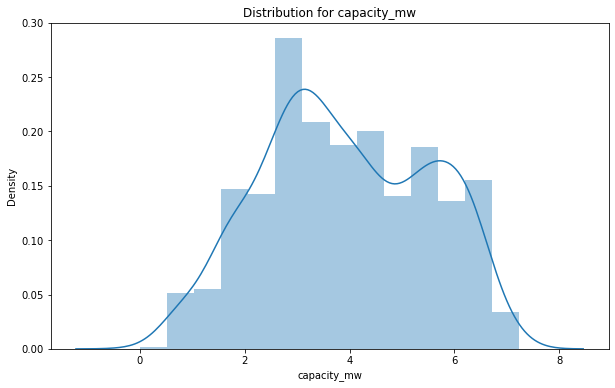

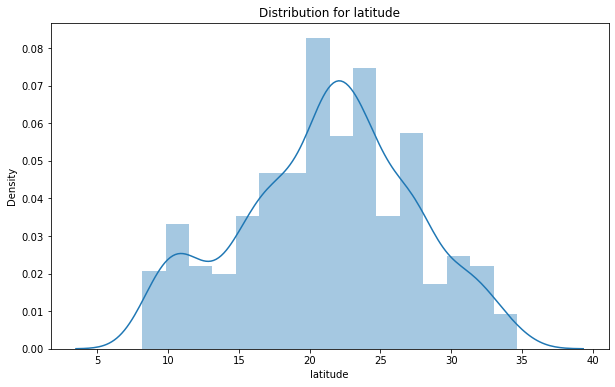

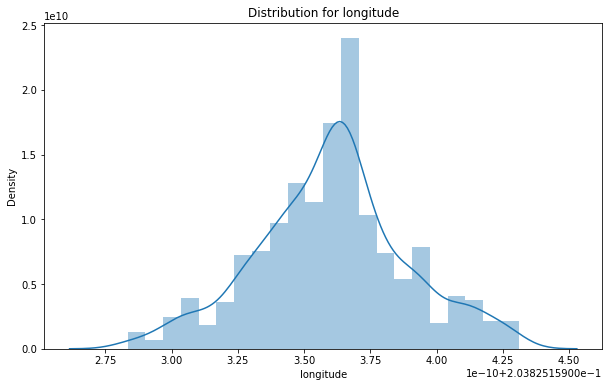

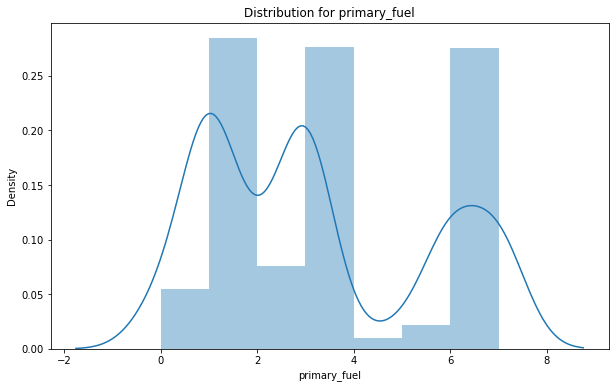

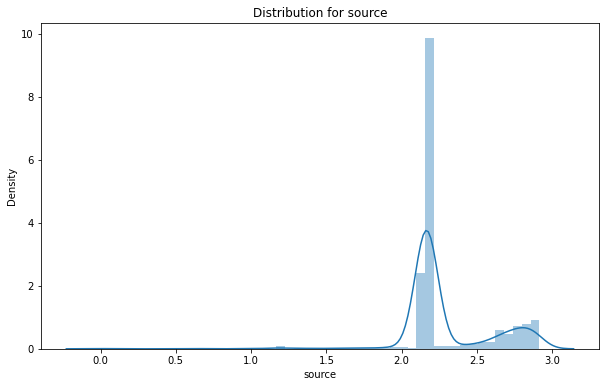

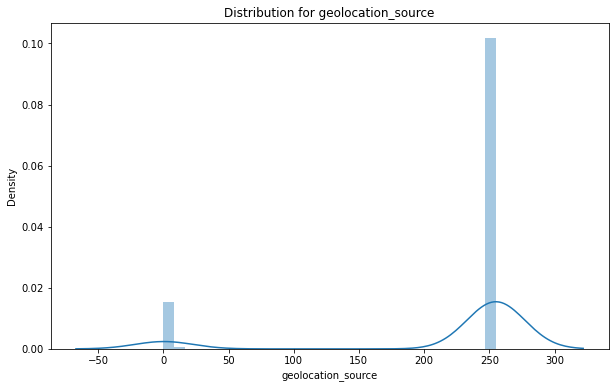

In [43]:
#checking the skewnss via the graphical representation
for skew_columns in df.columns:
    if df[skew_columns].dtype in ['int64', 'float64']: # checking if the column is numeric
        plt.figure(figsize=(10, 6))
        sns.distplot(df[skew_columns])
        plt.title('Distribution for {}'.format(skew_columns))
        plt.show()

In [44]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['primary_fuel']) 
Y = df['primary_fuel']

- As we have already have source as the column name we have consedered to drop the urls. 
- In my opinion since IND is the only country in the feature: country, therefore i have dropped it 

In [45]:
# checking the correlation within the features. 
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
name,1.000000,0.332205,0.013507,-0.135247,0.031000,0.040753,-0.030432,0.042171
gppd_idnr,0.332205,1.000000,-0.565769,-0.105728,-0.402727,0.609180,0.333034,-0.464105
capacity_mw,0.013507,-0.565769,1.000000,0.061565,0.319294,-0.536268,-0.325920,0.467576
latitude,-0.135247,-0.105728,0.061565,1.000000,-0.032290,-0.010204,0.045715,-0.188409
longitude,0.031000,-0.402727,0.319294,-0.032290,1.000000,-0.393324,-0.202930,0.301366
primary_fuel,0.040753,0.609180,-0.536268,-0.010204,-0.393324,1.000000,0.018340,-0.485448
source,-0.030432,0.333034,-0.325920,0.045715,-0.202930,0.018340,1.000000,-0.399994
geolocation_source,0.042171,-0.464105,0.467576,-0.188409,0.301366,-0.485448,-0.399994,1.000000


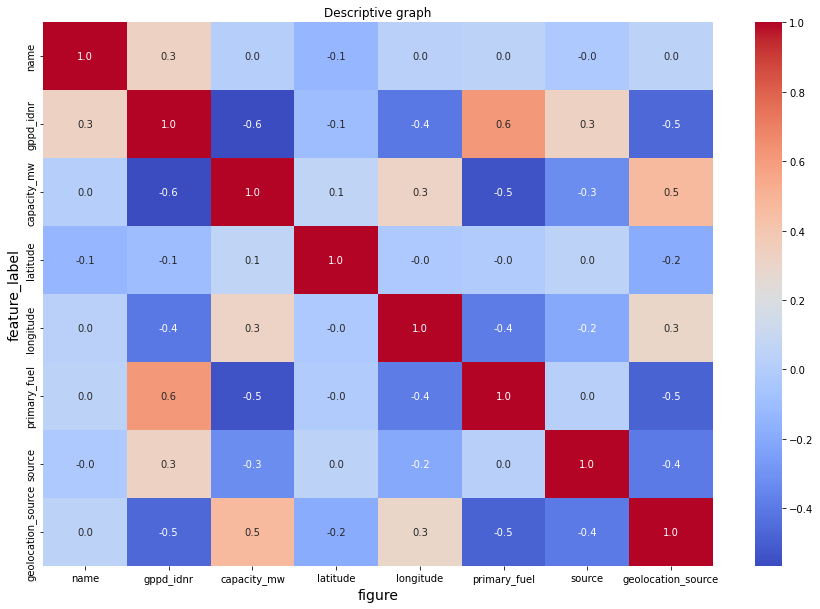

In [46]:
# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

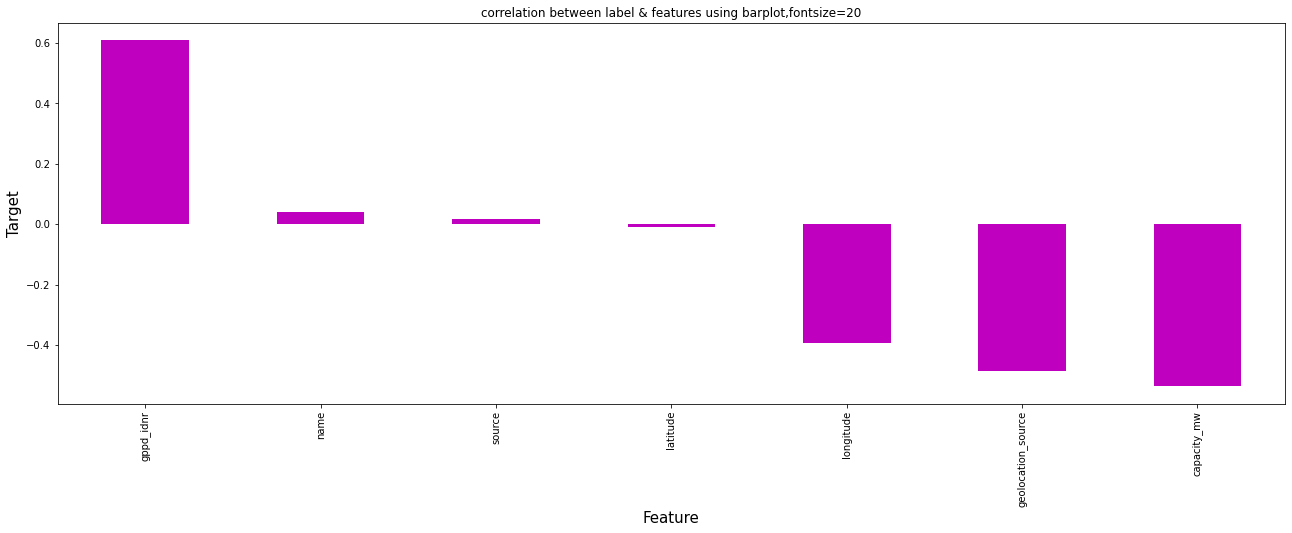

In [47]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

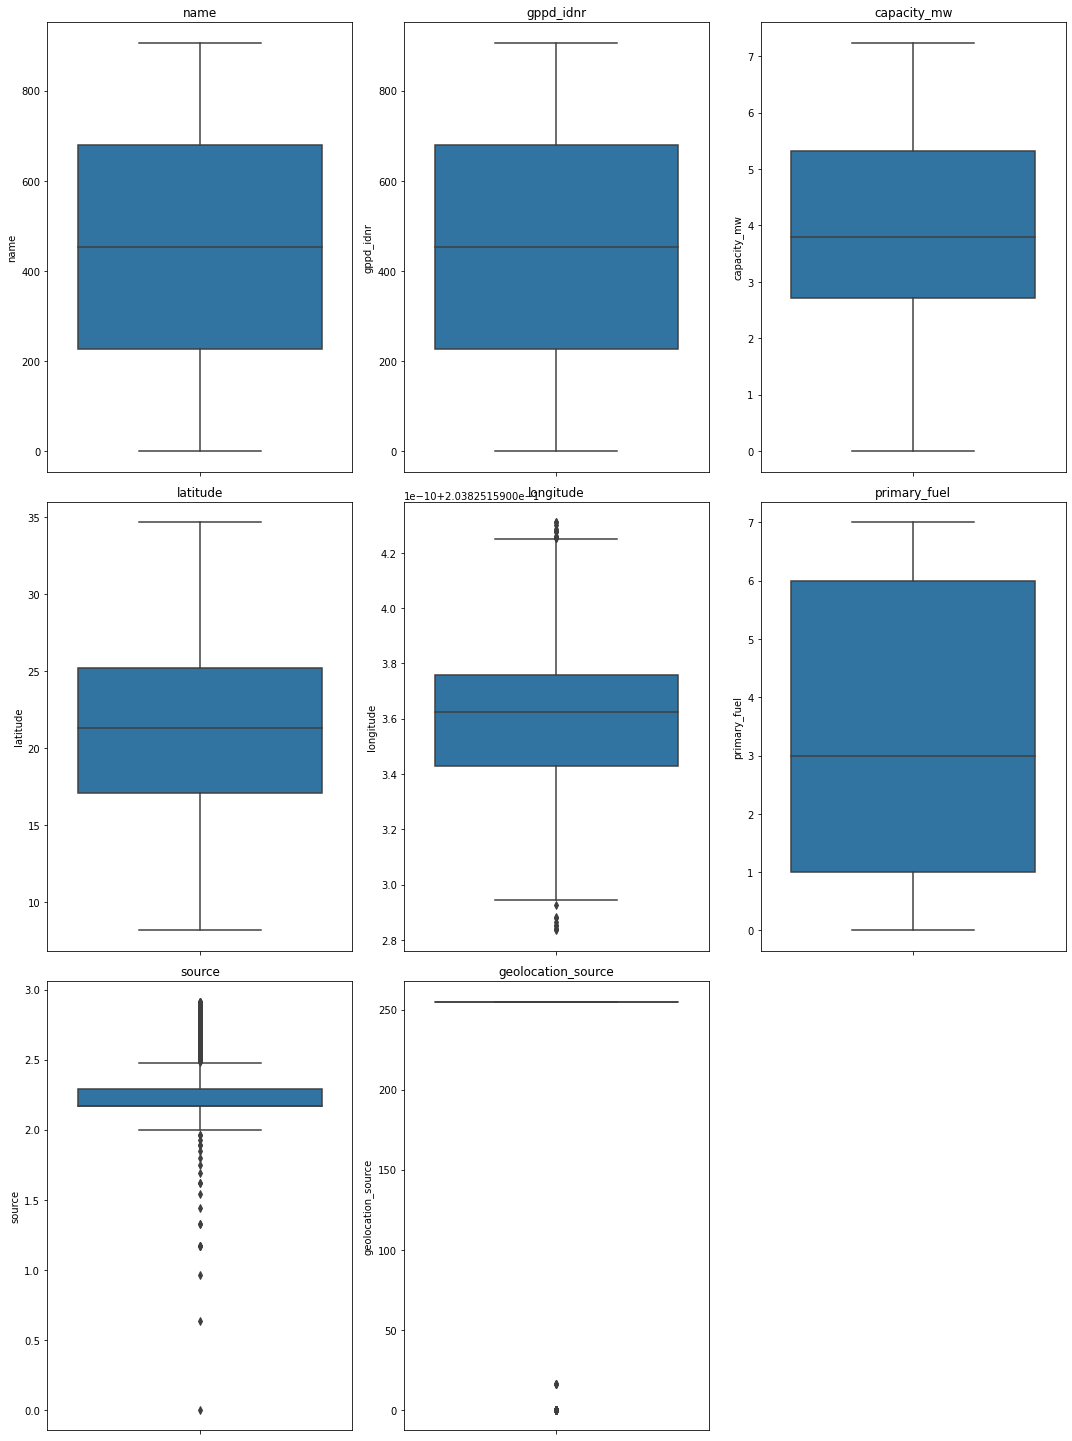

In [48]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data=df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()

In [49]:
from scipy.stats import zscore
feature_outlier = ['geolocation_source', 'longitude', 'source']
z = np.abs(df[feature_outlier].apply(zscore))
print(z)


     geolocation_source  longitude    source
0              2.345400   0.952547  1.582861
1              0.396062   0.544956  2.036658
2              0.396062   2.380012  0.471879
3              0.396062   2.174322  0.403248
4              0.396062   1.117232  0.403248
..                  ...        ...       ...
902            0.396062   0.153627  0.403248
903            2.530510   0.332906  1.211010
904            0.396062   0.280789  0.471879
905            0.396062   0.796367  0.904767
906            0.396062   0.180926  0.471879

[907 rows x 3 columns]


In [50]:
# Defining a threshold limit
threshold = 3

In [51]:
# Removing outliers
df_new = df[(z < threshold).all(axis=1)]

In [52]:
# Printing shapes to check data loss
print("Old dataframe shape:", df.shape)
print("New dataframe shape:", df_new.shape)

Old dataframe shape: (907, 8)
New dataframe shape: (898, 8)


In [53]:
data_loss = ((df.shape[0] - df_new.shape[0]) / df_new.shape[0]) * 100
print("Data Loss Percentage =", data_loss)

Data Loss Percentage = 1.0022271714922049


In [54]:
# We shall proceed with the new data frame. 

In [55]:
X1 = df_new.drop(columns=['primary_fuel'])
Y1 = df_new['primary_fuel']

In [56]:
#To check if the feature matrix are stored in the X & the response (target) in vector y. 
X1

,name,gppd_idnr,capacity_mw,latitude,longitude,source,geolocation_source
0,0,657,1.223336,28.1839,0.203825,2.756354,16.128645
1,1,519,4.215362,24.7663,0.203825,2.890635,254.992372
2,2,853,3.445715,21.9038,0.203825,2.148343,254.992372
3,3,0,4.480294,23.8712,0.203825,2.168651,254.992372
4,4,1,6.520685,21.9603,0.203825,2.168651,254.992372
...,...,...,...,...,...,...,...
902,902,491,6.432017,16.2949,0.203825,2.168651,254.992372
903,903,822,1.350320,12.8932,0.203825,2.646321,0.000000
904,904,891,3.080811,15.2758,0.203825,2.148343,254.992372
905,905,539,4.046274,24.3500,0.203825,2.555702,254.992372


In [57]:
Y1

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 898, dtype: int64

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column for the intercept term
df_new_with_constant = add_constant(df_new)

# Calculate VIF for each column
vif_data = pd.Series([variance_inflation_factor(df_new_with_constant.values, i)
               for i in range(df_new_with_constant.shape[1])], 
              index=df_new_with_constant.columns)

print(vif_data)

const                 0.000000
name                  1.336135
gppd_idnr             2.991887
capacity_mw           1.860863
latitude              1.110074
longitude             1.297672
primary_fuel          2.711987
source                2.153734
geolocation_source    2.089507
dtype: float64


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [62]:
# Split the data
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [63]:
def metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train):
    if train == True: 
        pred = clf.predict(X1_train)
        print("\n======================Train Result==========================")
        print(f"Accuracy Score : {accuracy_score(Y1_train, pred) * 100:.2f}%")
    elif train == False: 
        pred = clf.predict(X1_test)
        print("\n======================Test Result==========================")
        print(f"Accuracy Score : {accuracy_score(Y1_test, pred) * 100:.2f}%")
        print('\n \n Test Classification Report \n', classification_report(Y1_test, pred, digits=2))

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# training the model 
rf.fit(X1_train, Y1_train)

RandomForestClassifier()

In [65]:
metric_score(rf, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(rf, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 100.00%

======================Test Result==========================
Accuracy Score : 80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.74      0.91      0.82        54
           2       0.00      0.00      0.00        14
           3       0.79      0.89      0.83        54
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        22
           7       1.00      1.00      1.00        18

    accuracy                           0.80       180
   macro avg       0.55      0.57      0.56       180
weighted avg       0.73      0.80      0.76       180



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting
gb = GradientBoostingClassifier()

# training the model
gb.fit(X1_train, Y1_train)

GradientBoostingClassifier()

In [67]:
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 99.44%

======================Test Result==========================
Accuracy Score : 80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.74      0.93      0.82        54
           2       0.60      0.21      0.32        14
           3       0.80      0.83      0.82        54
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        22
           7       1.00      1.00      1.00        18

    accuracy                           0.80       180
   macro avg       0.61      0.58      0.58       180
weighted avg       0.77      0.80      0.78       180



In [68]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()

# training the model
dt.fit(X1_train, Y1_train)

DecisionTreeClassifier()

In [69]:
metric_score(dt, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(dt, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 100.00%

======================Test Result==========================
Accuracy Score : 73.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.70      0.65      0.67        54
           2       0.06      0.07      0.07        14
           3       0.78      0.83      0.80        54
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.95      0.98        22
           7       1.00      1.00      1.00        18

    accuracy                           0.73       180
   macro avg       0.65      0.61      0.63       180
weighted avg       0.74      0.73      0.74       180



In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# training the model 
lr.fit(X1_train, Y1_train)

LogisticRegression()

In [71]:
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 99.44%

======================Test Result==========================
Accuracy Score : 80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.74      0.93      0.82        54
           2       0.60      0.21      0.32        14
           3       0.80      0.83      0.82        54
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        22
           7       1.00      1.00      1.00        18

    accuracy                           0.80       180
   macro avg       0.61      0.58      0.58       180
weighted avg       0.77      0.80      0.78       180



In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X1_train, Y1_train)
predictions = lr.predict(X1_test)

In [73]:
models = RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

In [74]:
from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

# For each model
for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X1, Y1, cv=5)
    
    # Print cross-validation score for each model
    print(f'{type(model).__name__}: {scores.mean():.2f} +/- {scores.std():.2f}')

RandomForestClassifier: 0.78 +/- 0.03
GradientBoostingClassifier: 0.78 +/- 0.04
DecisionTreeClassifier: 0.72 +/- 0.05
LogisticRegression: 0.64 +/- 0.02


In [75]:
# Names of the models
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

# Cross-validation scores
cross_val_scores = [0.83, 0.75, 0.77, 0.73]
# Standard Deviation scores
std_scores = [0.03, 0.03, 0.04, 0.03] 



# Create a dataframe
df = pd.DataFrame({
    'Model': model_names,
    'Cross_Val_Score': cross_val_scores,
    'Std_Score': std_scores
})

# Print the dataframe
print(df)

                        Model  Cross_Val_Score  Std_Score
0      RandomForestClassifier             0.83       0.03
1  GradientBoostingClassifier             0.75       0.03
2      DecisionTreeClassifier             0.77       0.04
3          LogisticRegression             0.73       0.03


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X1, Y1, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.8        0.75555556 0.83333333 0.79888268 0.77094972]
Average cross-validation score:  0.7917442582247052


In [77]:
# Generate some random data for demonstration
x, y = make_classification(n_samples=900)

# Create a Random Forest Classifier object
rf = RandomForestClassifier()

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_rf.fit(x, y)

# Print the best parameters found
print("Best parameters found: ", grid_rf.best_params_)

# Print the best score found
print("Best score found: ", grid_rf.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score found:  0.9511111111111111


In [79]:
# Get the best parameters
best_params = grid_rf.best_params_
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_rf.best_score_
print("Best score found: ", best_score)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score found:  0.9511111111111111


In [80]:
#Reffitting the model 
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X1_train, Y1_train)

RandomForestClassifier(bootstrap=False, n_estimators=50)

In [83]:
data_Predict= {'name': [8],
              'gppd_idnr':[791],
              'capacity_mw': [4.54],
              'latitude':[16.2949],
              'longitude':[0.20325],   
              'source':[2.168651],
              'geolocation_source': [254.992372]}
df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred

,name,gppd_idnr,capacity_mw,latitude,longitude,source,geolocation_source
0,8,791,4.54,16.2949,0.20325,2.168651,254.992372


In [84]:
# Predicting the result using the best model. 
new_pred = best_rf.predict(df_pred)
print(new_pred)

[7]


In [95]:
from joblib import dump, load

# saving the model. 
dump(best_rf, 'best_rf.joblib') 

# Loading the model
best_rf_from_joblib = load('best_rf.joblib') 

# using the loaded model to make predictions
best_rf_from_joblib.predict(X1_test)

array([1, 2, 1, 3, 2, 1, 1, 0, 7, 1, 1, 0, 1, 1, 1, 1, 2, 6, 1, 1, 3, 3,
       6, 3, 3, 5, 7, 3, 2, 3, 3, 3, 6, 1, 7, 3, 1, 3, 6, 7, 6, 6, 1, 7,
       1, 3, 7, 0, 7, 6, 3, 5, 1, 1, 6, 1, 0, 7, 1, 1, 3, 6, 2, 1, 6, 3,
       3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 0, 3, 3, 7, 0, 3, 1, 1, 3, 6, 1, 3,
       3, 6, 1, 1, 6, 3, 3, 3, 1, 1, 1, 1, 6, 1, 1, 7, 0, 3, 3, 7, 7, 1,
       0, 6, 3, 3, 7, 1, 1, 6, 3, 3, 3, 3, 2, 3, 1, 3, 5, 1, 3, 7, 1, 3,
       3, 7, 6, 1, 0, 6, 3, 1, 6, 3, 1, 2, 2, 1, 3, 6, 7, 3, 1, 1, 3, 1,
       2, 1, 1, 3, 3, 7, 3, 1, 1, 1, 1, 3, 7, 3, 3, 1, 1, 1, 6, 3, 1, 3,
       1, 1, 1, 1], dtype=int64)

In [112]:
#Model 2 : capacity_mw

In [169]:
X2 = df_new.drop(columns=['capacity_mw'])
Y2 = df_new['capacity_mw']

In [170]:
# Split the data
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X2_train, Y2_train)

rfr = RandomForestRegressor()
rfr.fit(X2_train, Y2_train)

gr = GradientBoostingRegressor()
gr.fit(X2_train, Y2_train)

dt = DecisionTreeRegressor()
dt.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [173]:
lr_predictions = lr.predict(X2_test)
rfr_predictions = rfr.predict(X2_test)
gr_predictions = gr.predict(X2_test)
dt_predictions = dt.predict(X2_test)

# Now, you can calculate the mean squared error for each model
lr_mse = mean_squared_error(Y2_test, lr_predictions)
rfr_mse = mean_squared_error(Y2_test, rfr_predictions)
gr_mse = mean_squared_error(Y2_test, gr_predictions)
dt_mse = mean_squared_error(Y2_test, dt_predictions)

lr_mae = mean_absolute_error(Y2_test, lr_predictions)
rfr_mae = mean_absolute_error(Y2_test, rfr_predictions)
gr_mae = mean_absolute_error(Y2_test, gr_predictions)
dt_mae = mean_absolute_error(Y2_test, dt_predictions)

lr_r2 = r2_score(Y2_test, lr_predictions)
rfr_r2 = r2_score(Y2_test, rfr_predictions)
gr_r2 = r2_score(Y2_test, gr_predictions)
dt_r2 = r2_score(Y2_test, dt_predictions)

In [174]:
# Print Mean Squared Error for each model
print("Linear Regression MSE: ", lr_mse)
print("Random Forest Regressor MSE: ", rfr_mse)
print("Gradient Boosting Regressor MSE: ", gr_mse)
print("Decision Tree Regressor MSE: ", dt_mse)

# Print Mean Absolute Error for each model
print("\nLinear Regression MAE: ", lr_mae)
print("Random Forest Regressor MAE: ", rfr_mae)
print("Gradient Boosting Regressor MAE: ", gr_mae)
print("Decision Tree Regressor MAE: ", dt_mae)

# Print R2 Score for each mode
print("\nLinear Regression R2 Score: ", lr_r2)
print("Random Forest Regressor R2 Score: ", rfr_r2)
print("Gradient Boosting Regressor R2 Score: ", gr_r2)
print("Decision Tree Regressor R2 Score: ", dt_r2)

Linear Regression MSE:  1.341829025848147
Random Forest Regressor MSE:  0.8560562781475407
Gradient Boosting Regressor MSE:  0.7990322765835651
Decision Tree Regressor MSE:  1.4389695949148416

Linear Regression MAE:  0.9360460608727487
Random Forest Regressor MAE:  0.6942138425307058
Gradient Boosting Regressor MAE:  0.6808259229907508
Decision Tree Regressor MAE:  0.9018243326445765

Linear Regression R2 Score:  0.43463483935274916
Random Forest Regressor R2 Score:  0.63930993748473
Gradient Boosting Regressor R2 Score:  0.663336384359799
Decision Tree Regressor R2 Score:  0.39370571024776246


In [141]:
# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse, rfr_mse, gr_mse, dt_mse],
    'Mean Absolute Error (MAE)': [lr_mae, rfr_mae, gr_mae, dt_mae],
    'R^2 Score': [lr_r2, rfr_r2, gr_r2, dt_r2]}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
0  Linear Regression                  1.341829                   0.936046   
1      Random Forest                  0.857995                   0.696172   
2  Gradient Boosting                  0.802101                   0.682662   
3      Decision Tree                  1.476542                   0.903158   

   R^2 Score  
0   0.434635  
1   0.638493  
2   0.662043  
3   0.377875  


In [152]:
# Prection on the test data. 
y_pred1 = lr.predict(X1_test)
y_pred2 = rfr.predict(X1_test)
y_pred3 = gr.predict(X1_test)
y_pred4 = dt.predict(X1_test)
df2 = pd.DataFrame({'Actual': Y1_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [153]:
df2

,Actual,Lr,rfr,gr,dt
334,1,-3.450689e+09,5.528062,5.313566,6.147334
645,1,-2.036163e+09,5.552200,5.664095,5.678354
329,3,-2.948060e+09,5.969920,5.591477,6.213798
855,3,-4.773575e+09,5.964234,5.251515,6.213798
39,1,-3.974285e+09,6.217250,6.296029,6.477705
...,...,...,...,...,...
784,3,-2.948060e+09,5.551771,5.543672,5.129266
25,6,-2.948060e+09,4.101979,3.018590,2.477808
84,1,-3.002233e+09,6.008122,5.393696,6.213798
10,1,-2.931249e+09,6.123261,5.498093,6.477705


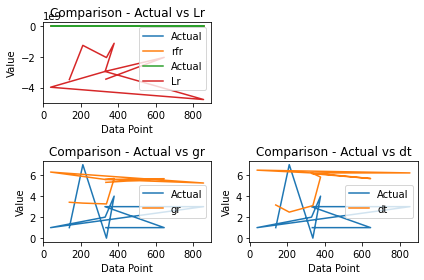

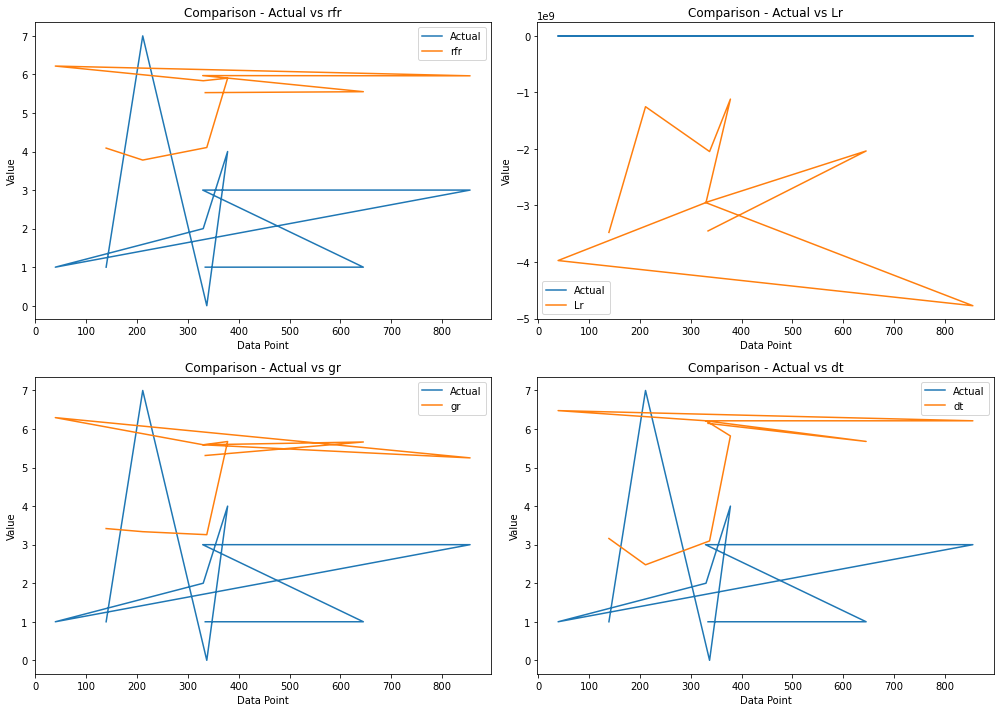

In [161]:
plt.figure(figsize=(14, 10))  # Adjust size of figure as per your needs

plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()


In [175]:
# Calculating mean squared error (MSE) for each model
mse_lr = mean_squared_error(df2['Actual'], df2['Lr'])
mse_rfr = mean_squared_error(df2['Actual'], df2['rfr'])
mse_gr = mean_squared_error(df2['Actual'], df2['gr'])
mse_dt = mean_squared_error(df2['Actual'], df2['dt'])

# dictionary that stores the MSE values
mse_scores = {'Linear Regression': mse_lr,
    'Random Forest': mse_rfr,
    'Gradient Boosting': mse_gr,
    'Decision Tree': mse_dt}

# To find the best model 
best_model = min(mse_scores, key=mse_scores.get)

print("The best model is:", best_model)

The best model is: Gradient Boosting


In [176]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X1_train, Y1_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print()

# Train the best model on the entire training set
best_model.fit(X1_train, Y1_train)

# Evaluate the best model on the testing set
best_predictions = best_model.predict(X2_test)
best_mse = mean_squared_error(Y2_test, best_predictions)
best_mae = mean_absolute_error(Y2_test, best_predictions)
best_r2 = r2_score(Y2_test, best_predictions)

print("Best Model Evaluation:")
print("MSE:", best_mse)
print("MAE:", best_mae)
print("R-squared:", best_r2)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}

Best Model Evaluation:
MSE: 12.910875538786984
MAE: 3.278293850299349
R-squared: -4.439857897297434


In [177]:
# Importing the joblib module
from joblib import dump, load

# Saving the model to disk
filename = 'finalized_model.joblib'
dump(best_model, filename)

# Loading the model from disk
loaded_model = load(filename)

# Use the model to make predictions
result = loaded_model.score(X1_test, Y1_test)
print(result)

0.8386061182905227


In [178]:
# Saving the model to disk
filename = 'finalized_model.joblib'
dump(best_model, filename)

# Load the model from disk
loaded_model = load(filename)

# Use the model to make predictions
result = loaded_model.score(X2_test, Y2_test)
print(result)

-4.439857897297434
